In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
df  = pd.read_csv("student_scores.csv")

In [44]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,NaN,30


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   22 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [46]:
df.describe()

,Hours,Scores
count,22.000000,25.000000
mean,4.995455,51.480000
std,2.625602,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.950000,47.000000
75%,7.500000,75.000000
max,9.200000,95.000000


In [47]:
df.dropna(inplace = True)

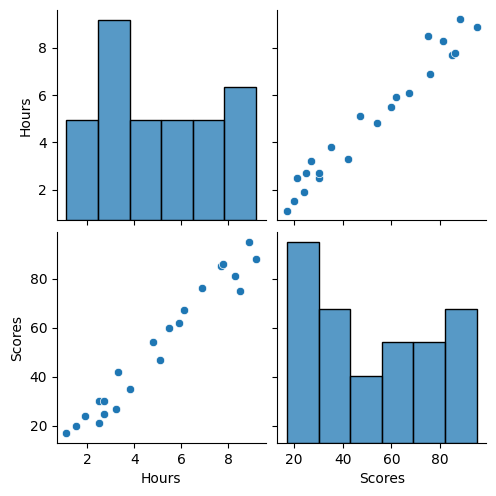

In [48]:
sns.pairplot(df)

In [90]:
y = df["Scores"]
X = df[["Hours"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1650)

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

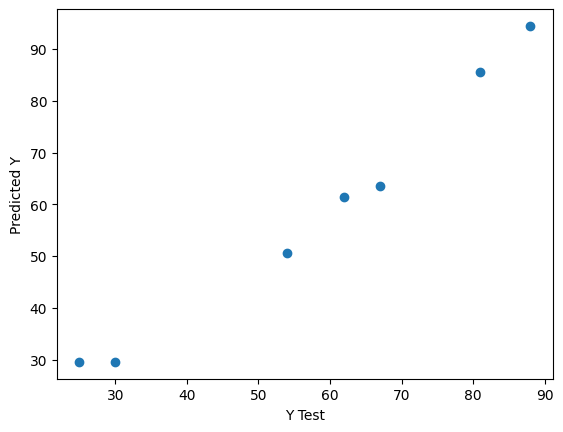

In [93]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [94]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 Score",metrics.r2_score(y_test, predictions))

MAE: 3.340031278226919
MSE: 15.320227825837282
RMSE: 3.9141062614391657
R2 Score 0.9685955838576796


In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

Text(0, 0.5, 'Predicted Y')

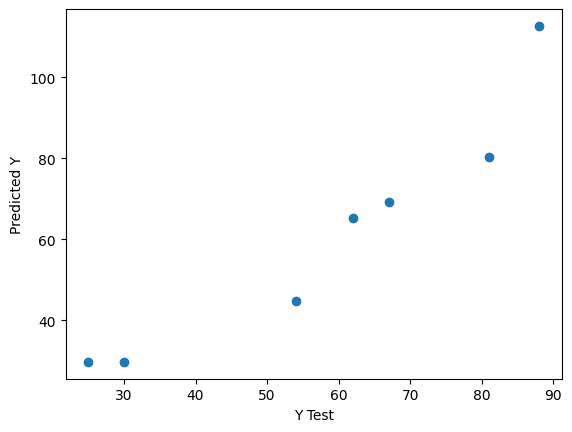

In [97]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')